# TME2: Prise en main de PIL et Matplotlib

> Consignes: le fichier **TME2_Sujet.ipynb** est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2018/course/view.php?id=4650. Si vous êtes en binôme, renommez-le en **TME2_nom1_nom2.ipynb**.
<tt>PIL</tt> (https://pillow.readthedocs.io/en/stable/index.html) est le module qui nous permet de lire, manipuler et écrire des images avec un grand nombre de formats possible. <tt>Matplotlib</tt> permet d'afficher des courbes et des images, il est chargé par l'intermédiaire du meta-module <tt>pylab</tt>. Les deux modules sont importés par la série d'instructions Python suivante:

In [1]:
from PIL import Image, ImageOps
from pylab import *

## Exercice 1 : chargement d'image et visualisation
### 1.1 Voir une image
Écrire un code Python qui charge l'image <tt>img/genies-math.jpg</tt> et l'affiche à l'aide de la commande imshow(). Afficher le mode de cette image.

RGB


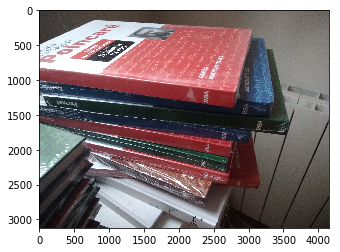

In [2]:
genies = Image.open("img/genies-math.jpg")
print(genies.mode)
imshow(genies)


### 1.2 Conversion de mode
Convertir cette image en image à niveau de gris. Afficher simultanément les deux images couleurs et niveaux de gris,  l'une à droite, l'autre à gauche, sans les axes. Donner un titre à chaque image.

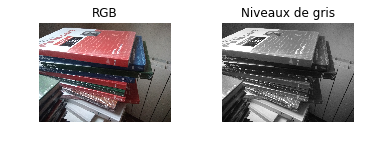

In [3]:
genies = Image.open("img/genies-math.jpg")
subplot (2,2,1)
title('RGB')
axis('off')
imshow(genies)
subplot (2,2,2)
title('Niveaux de gris')
axis('off')
imshow(genies.convert('L'))

### 1.3 Histogramme
Utiliser la méthode <tt>histogram()</tt> de la classe <tt>Image</tt> pour calculer l'histogramme de l'image en niveau de gris calculée à la question précédente. Afficher l'histogramme sous la forme d'un graphe de bar.

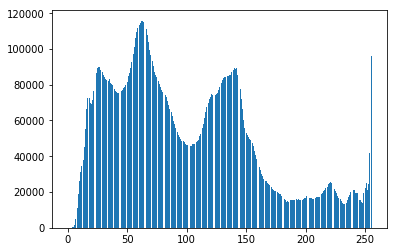

In [4]:
genies = Image.open("img/genies-math.jpg")
genies_gris = genies.convert('L')
his = genies_gris.histogram()
##plot(his)
bar(range(len(his)),his)
show()

### 1.4 Égalisation d'histogramme
Utiliser les fonctions <tt>egalisation()</tt> et <tt>applique()</tt> du TME1 pour créer une liste de nouvelle valeurs dont l'histogramme a été égaliser. Puis en faire une nouvelle image PIL. Afficher l'image avant, puis après égalisation. Afficher l'histogramme de l'image égalisée.

<BarContainer object of 256 artists>

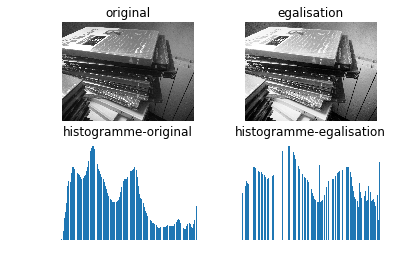

In [20]:
import math
from math import ceil

def egalisation(his):
## list[int] -> list[int] 

    hc=[0]*len(his)
    
    #calculer l'histogramme cumule
    hc[0]=his[0]
    for i in range(1, len(his)):        
            hc[i] = his[i]+hc[i-1]
            
            
    #calculer le coefficient
    alpha=(len(his)-1)/hc[len(his)-1]
    
    #calculer le resultat
    table=[0]*len(his)
    for i in range(len(his)):
        table[i]=math.ceil(alpha*hc[i])
    
    return table



def applique(data,table):
    """ list[int]*list[int] -> list[int] """
    
    res = [0]*len(data)
    
    for i in range(len(data)):
        res[i] = table[data[i]]
        
    return res


genies = Image.open("img/genies-math.jpg").convert('L')
data = genies.getdata()
his = genies.histogram()



vecteur = list(data)

table = egalisation(his)
vecteur = applique(vecteur,table)

egaGenies = genies.copy()
egaGenies.putdata(vecteur)

subplot(2,2,1)
axis("off")
title("original")
imshow(genies)

subplot(2,2,3)
axis("off")
title("histogramme-original")
bar(range(len(his)),his)

subplot(2,2,2)
axis("off")
title("egalisation")
imshow(egaGenies)

subplot(2,2,4)
axis("off")
title("histogramme-egalisation")
his2 = egaGenies.histogram()
bar(range(len(his2)),his2)

### 1.5 Egalisation d'histogramme (suite)
La classe <tt>ImageOps</tt> du module <tt>PIL</tt> contient une méthode <tt>equalize()</tt> qui égalise l'histogramme d'une image. Utiliser cette méthode et comparer le résultat avec votre propre fonction d'égalisation (comparer aussi les deux histogrammes après égalisation).

<BarContainer object of 256 artists>

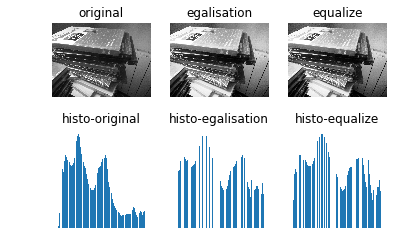

In [26]:
#genies = Image.open("img/genies-math.jpg").convert('L')
equGenies = ImageOps.equalize(genies)
his3 = equGenies.histogram()

subplot(2,3,1)
axis("off")
title("original")
imshow(genies)

subplot(2,3,4)
axis("off")
title("histo-original")
bar(range(len(his)),his)

subplot(2,3,2)
axis("off")
title("egalisation")
imshow(egaGenies)

subplot(2,3,5)
axis("off")
title("histo-egalisation")
his2 = egaGenies.histogram()
bar(range(len(his2)),his2)

subplot(2,3,3)
axis("off")
title("equalize")
imshow(equGenies)

subplot(2,3,6)
axis("off")
title("histo-equalize")
bar(range(len(his3)),his3)

## Exercice 2 : parcours d'image et calcul de statistiques
### 2.1 Calcul des extrema de l'image par parcours
Écrire une fonction <tt>extrema()</tt> qui prend une image PIL, la parcours pixel par pixel, à l'aide de classe <tt>PyAcess</tt> (ou une des autres méthodes vues en cours) et retourne ses valeurs minimale et maximale.


In [7]:
def extrema(image):
    data = image.getdata()
    vecteur = list(data)
    
    minP = 255
    maxP = 0

    for v in range(len(vecteur)):
        if v < minP:
            minP = v
        if v > maxP:
            maxP = v
            
    return minP, maxP


genies = Image.open("img/genies-math.jpg")
extrema(genies)

(0, 12979199)

### 2.2 Application et temps de calcul
Appliquer la fonction <tt>extrema()</tt> à l'image <tt>img/genies-math.jpg</tt>, convertie en niveau de gris. Comparer le temps d'exécution avec la méthode <tt>getextrema()</tt> de la classe Image. Pour comparer les temps d'exécution, on peut utiliser les deux fonctions <tt>tic()</tt> et <tt>tac()</tt>: la première démarre un chronomètre, la seconde affiche le temps écoulés depuis le dernier appel de l'un des deux fonctions. Quelle est la taille de cette image ? Comment expliquer ces différences de temps d'exécution ?

In [8]:
from time import process_time
mytime = 0
def tic():
    global mytime
    mytime = process_time()
def tac():
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

genies = Image.open("img/genies-math.jpg")

tic()
extrema(genies)
tac()
    
tic()
genies.getextrema()
tac()


2.2811293530000007
0.045748795999999814


## Exercice 3: sur la couleur
### 3.1 séparation de canaux
Écrire un code Python qui charge l'image <tt>mandrill.png</tt>. Vérifier, à l'aide d'un test de son mode est bien <tt>RGB</tt>.
Séparer les 3 canaux à l'aide de la méthode <tt>split()</tt> de la classe <tt>Image</tt>. On peut aussi, de façon alternative, utiliser la méthode <tt>getchannel()</tt>

In [1]:
mandrill = Image.open("img/mandrill.png")
print(genies.mode)
r,g,b = mandrill.split()

subplot (1,4,1)
title('Original')
axis('off')
imshow(mandrill)
subplot (1,4,2)
title('R')
axis('off')
imshow(r)
subplot (1,4,3)
title('G')
axis('off')
imshow(g)
subplot (1,4,4)
title('B')
axis('off')
imshow(b)

NameError: name 'Image' is not defined

### 3.2 échange de canaux
Créer une nouvelle image <tt>RGB</tt> dans laquelle on a échanger les canaux rouge et bleu. Afficher cette nouvelle image. On pourrat utilise la méthode <tt>merge()</tt> de la classe <tt>Image</tt>. Visualiser la nouvelle image. Essayer différente combinaison de canaux.

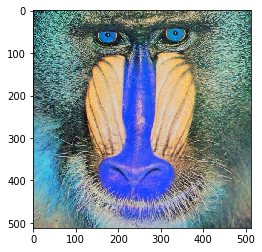

In [10]:
mandrill = Image.open("img/mandrill.png")
r,g,b = mandrill.split()

mandrill_ech = Image.merge("RGB", (b,g,r))
imshow(mandrill_ech)

### 3.3 Canaux séparés dans leur couleur
Écrire un code Python qui créée une image montrant le canal rouge en niveau de rouge. 
Faire de même pour les deux autres canaux.

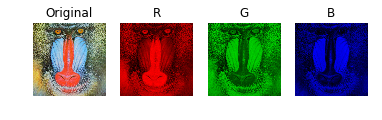

In [28]:
def canal_rouge(image):
    w,h = image.size
    rouge = Image.new("RGB", image.size)
    for i in range(h):
        for j in range(w):
            (r,g,b) = image.getpixel((i,j))
            rouge.putpixel((i,j),(r,0,0))
    return rouge

def canal_bleu(image):
    w,h = image.size
    bleu = Image.new("RGB", image.size)
    for i in range(h):
        for j in range(w):
            (r,g,b) = image.getpixel((i,j))
            bleu.putpixel((i,j),(0,0,b))
    return bleu

def canal_vert(image):
    w,h = image.size
    vert = Image.new("RGB", image.size)
    for i in range(h):
        for j in range(w):
            (r,g,b) = image.getpixel((i,j))
            vert.putpixel((i,j),(0,g,0))
    return vert

## test

mandrill = Image.open("img/mandrill.png")

subplot (1,4,1)
title('Original')
axis('off')
imshow(mandrill)
subplot (1,4,2)
title('R')
axis('off')
imshow(canal_rouge(mandrill))
subplot (1,4,3)
title('G')
axis('off')
imshow(canal_vert(mandrill))
subplot (1,4,4)
title('B')
axis('off')
imshow(canal_bleu(mandrill))

## Exercice 4: avec image codée sur deux octets et ou virgule flottante
### 4.1 Image codée sur 2 octets
Charger l'image <tt>img/CT-scan.png</tt> et afficher les extremas de cette image. Cette image est issue d'une acquisition IRM, chaque valeur . Afficher l'image telle quelle et commenter. Quel opération faut-il faire pour voir tous les détails? Réaliser cette opération et afficher l'image transformée.

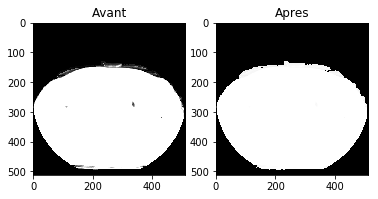

In [54]:
scan = Image.open("img/CT-scan.png").convert('L')
extrema(scan)


equScan = ImageOps.equalize(scan)

subplot (1,2,1)
imshow(scan)
title("Avant")
subplot (1,2,2)
title("Apres")
imshow(equScan)
#print(scan.getdata().width)

# image binaire
#mask = Image . new (’1’ ,(130 ,100))

### 4.2 Image codée en virgule flottante

Même question avec l'image <tt>img/sst.tig</tt> qui est codée en virgule flottante et réprésente une image satellite de température de surface de l'Océan Atlantique. Afficher son mode.


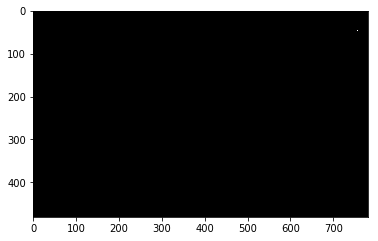

In [59]:
# en virgule flottante , pixels initiatilises a 0.5
#flt = Image.new (’F’ ,(130 ,100) ,0.5)

def etire(length,Xmin,Xmax):    
    m = [0]*length
    a = (length-1)/(Xmax - Xmin)
    b = Xmin
    
    for index in range(Xmin,Xmax+1):
        m[index] = math.ceil(a*(index-b))
        
    res = [0]*length
    
    for i in range(length):
        res[i] = m[data[i]]
        
    return res

sst=Image.open("img/sst.tif")
length=len(list(sst.getdata()))
Xmin,Xmax=sst.getextrema ()
res=etire(length,math.floor(Xmin),math.ceil(Xmax))
sst.putdata(res)
imshow(sst)